In [85]:
from gluefactory.datasets import augmentations  # Import your augmentations

import numpy as np
import cv2
from matplotlib import pyplot as plt


In [86]:
augmentation_map = {
    "dark": augmentations.DarkAugmentation,
    "lg": augmentations.LGAugmentation,
    "identity": augmentations.IdentityAugmentation
}

config = {"verbose": True}
# augmentor = augmentations.DarkAugmentation(config)
augmentor = augmentation_map["dark"]()

(680, 850, 3)
torch.Size([3, 680, 850])


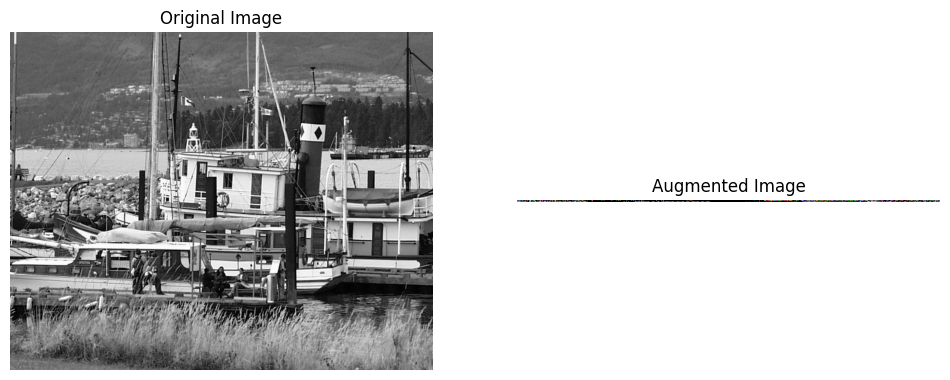

In [114]:
path = '/media/egoedeke/a9a96a4d-b323-489e-a833-13f4ade040c8/glue-factory/assets/boat1.png'
image = cv2.imread(path)

print(image.shape)

augmented_image = augmentor(image, return_tensor=True)


print(augmented_image.shape)

# convert to torch tensor to numpy array image

augmented_image = augmented_image.numpy().astype(np.uint8)

plt.figure(figsize=(12, 6))  # Increase the size of the plot

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
plt.title('Augmented Image')
plt.axis('off')


plt.show()




Original image shape (680, 850, 3) and type <class 'numpy.ndarray'>
Replay:
RandomGamma False
HueSaturationValue False
Blur False
MotionBlur False
ISONoise False
ImageCompression False
Blur False
MotionBlur False
RandomBrightnessContrast True
CLAHE False

Augmented image shape torch.Size([3, 680, 850]) and type <class 'torch.Tensor'>


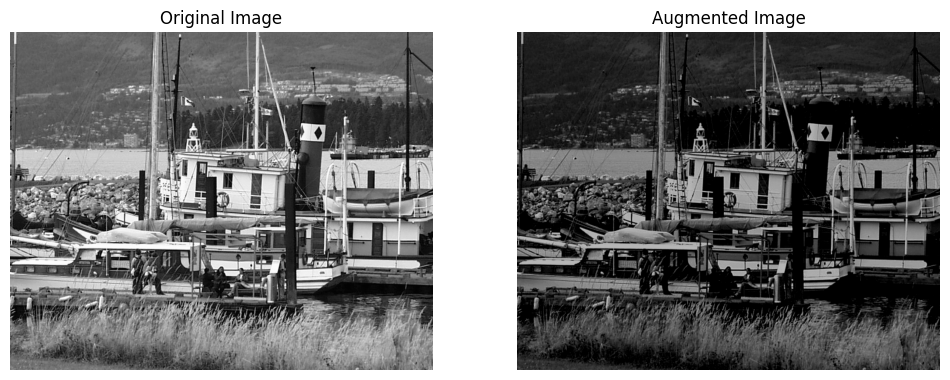

In [195]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from gluefactory.datasets import augmentations  # Import your augmentations
import torch
# Define augmentation configuration and load augmentation
augmentation_map = {
    "dark": augmentations.DarkAugmentation,
    "lg": augmentations.LGAugmentation,
    "identity": augmentations.IdentityAugmentation,
}

config = {
    "verbose": True,
    "p": 0.9,  # Probability for augmentation

}

# Initialize the augmentation
augmentor = augmentation_map["lg"](config)

# Load and augment the image
path = '/media/egoedeke/a9a96a4d-b323-489e-a833-13f4ade040c8/glue-factory/assets/boat1.png'
# convert image to torch tensor CHW

image = cv2.imread(path)
# image = image.astype('float32') / 255.0
# image = torch.from_numpy(image).unsqueeze(0)  # Add channel dimension to make it [1, H, W]


print(f"Original image shape {image.shape} and type {type(image)}")

# Apply augmentation
augmented_image = augmentor(image, return_tensor=True)
print(f"Augmented image shape {augmented_image.shape} and type {type(augmented_image)}")

# Convert torch tensor back to numpy for visualization
augmented_image = augmented_image.permute(1, 2, 0).numpy()  # Convert to HWC for visualization
augmented_image = (augmented_image * 255).astype(np.uint8)  # Rescale to uint8 if needed

# Plot original and augmented images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Augmented image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title('Augmented Image')
plt.axis('off')

plt.show()
